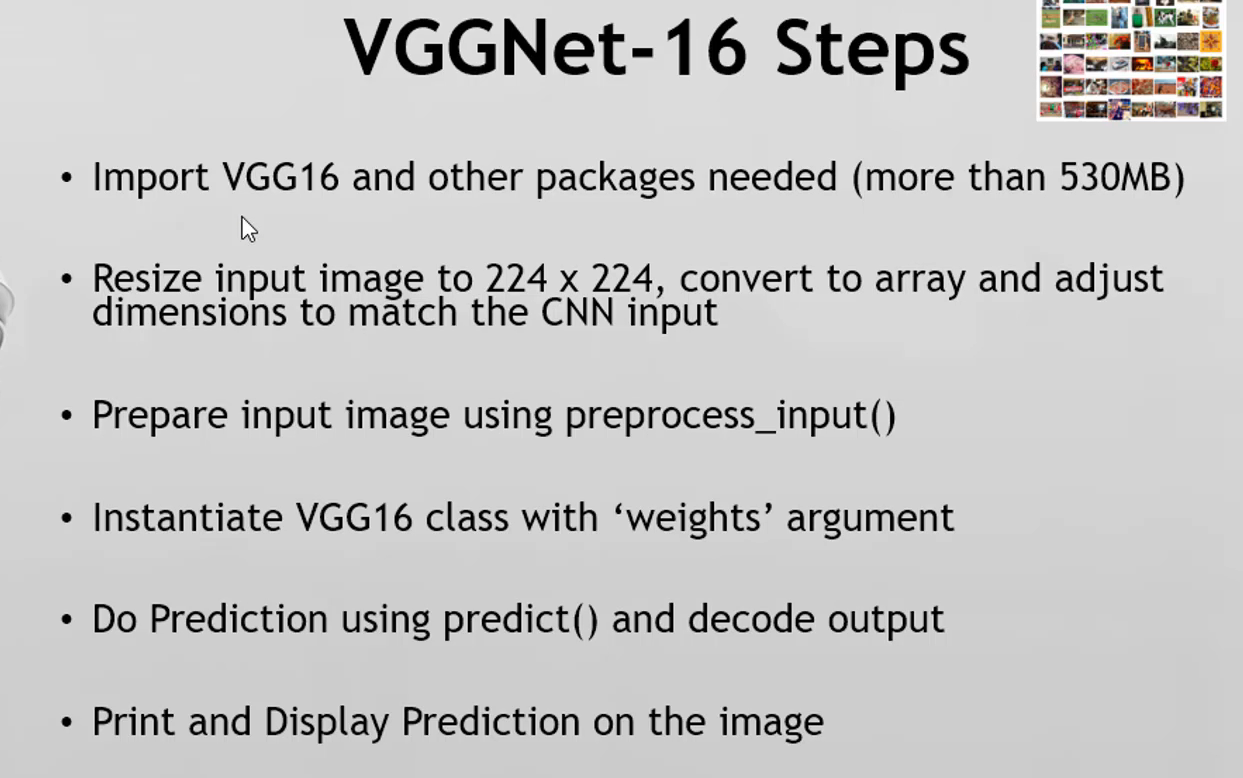

In [1]:
import keras
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0-dev20220716'

In [5]:
from keras.applications import VGG16
from keras.applications import imagenet_utils
#
import numpy as np
import cv2


In [6]:
import keras
import  keras.preprocessing.image ## import img_to_array, load_img

In [7]:
from tensorflow.keras.preprocessing.image  import img_to_array, load_img

In [33]:
#loading the image to predict
img_path = 'images/test6.jpg'
img = tf.keras.preprocessing.image.load_img(img_path)

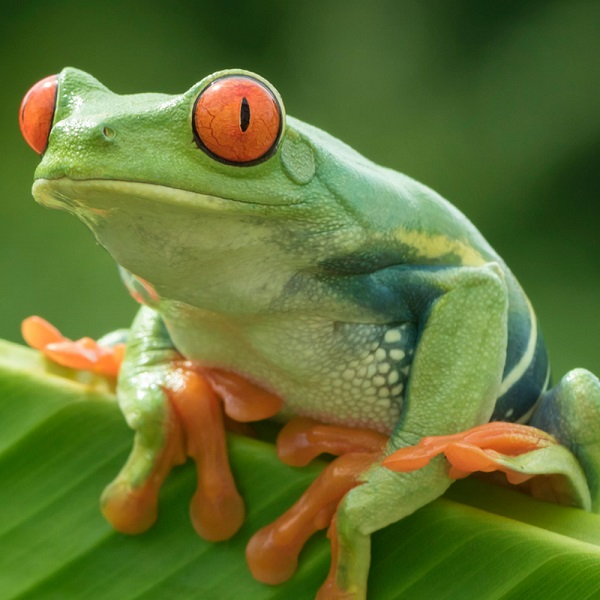

In [34]:
img

In [35]:
img.size

(600, 600)

In [36]:
#resize the image to 224x224 square shape
img = img.resize((224,224))

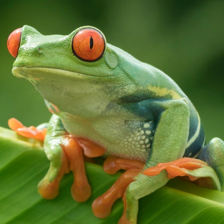

In [37]:
img

In [38]:
#convert the image to array
img_array = img_to_array(img)

In [39]:
img_array

array([[[ 21.,  54.,  11.],
        [ 22.,  54.,  12.],
        [ 24.,  55.,  13.],
        ...,
        [ 42.,  71.,  27.],
        [ 43.,  72.,  28.],
        [ 43.,  72.,  28.]],

       [[ 22.,  54.,  11.],
        [ 23.,  55.,  13.],
        [ 24.,  54.,  12.],
        ...,
        [ 45.,  74.,  30.],
        [ 45.,  74.,  30.],
        [ 45.,  74.,  30.]],

       [[ 23.,  54.,  12.],
        [ 23.,  54.,  12.],
        [ 24.,  54.,  12.],
        ...,
        [ 47.,  76.,  32.],
        [ 47.,  76.,  32.],
        [ 47.,  76.,  32.]],

       ...,

       [[101., 152.,  46.],
        [101., 152.,  46.],
        [103., 153.,  46.],
        ...,
        [ 64., 116.,   6.],
        [ 54., 106.,   1.],
        [ 50., 103.,   1.]],

       [[100., 152.,  43.],
        [100., 152.,  43.],
        [102., 152.,  43.],
        ...,
        [ 51., 103.,   0.],
        [ 50., 103.,   0.],
        [ 50., 102.,   1.]],

       [[101., 153.,  43.],
        [101., 153.,  43.],
        [100., 1

In [40]:
#convert the image into a 4 dimensional Tensor
#convert from (height, width, channels), (batchsize, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

In [41]:
img_array

array([[[[ 21.,  54.,  11.],
         [ 22.,  54.,  12.],
         [ 24.,  55.,  13.],
         ...,
         [ 42.,  71.,  27.],
         [ 43.,  72.,  28.],
         [ 43.,  72.,  28.]],

        [[ 22.,  54.,  11.],
         [ 23.,  55.,  13.],
         [ 24.,  54.,  12.],
         ...,
         [ 45.,  74.,  30.],
         [ 45.,  74.,  30.],
         [ 45.,  74.,  30.]],

        [[ 23.,  54.,  12.],
         [ 23.,  54.,  12.],
         [ 24.,  54.,  12.],
         ...,
         [ 47.,  76.,  32.],
         [ 47.,  76.,  32.],
         [ 47.,  76.,  32.]],

        ...,

        [[101., 152.,  46.],
         [101., 152.,  46.],
         [103., 153.,  46.],
         ...,
         [ 64., 116.,   6.],
         [ 54., 106.,   1.],
         [ 50., 103.,   1.]],

        [[100., 152.,  43.],
         [100., 152.,  43.],
         [102., 152.,  43.],
         ...,
         [ 51., 103.,   0.],
         [ 50., 103.,   0.],
         [ 50., 102.,   1.]],

        [[101., 153.,  43.],
       

In [42]:
img_array.size

150528

In [43]:
#preprocess the input image array
img_array = imagenet_utils.preprocess_input(img_array)


In [44]:
img_array

array([[[[ -92.939    ,  -62.779    , -102.68     ],
         [ -91.939    ,  -62.779    , -101.68     ],
         [ -90.939    ,  -61.779    ,  -99.68     ],
         ...,
         [ -76.939    ,  -45.779    ,  -81.68     ],
         [ -75.939    ,  -44.779    ,  -80.68     ],
         [ -75.939    ,  -44.779    ,  -80.68     ]],

        [[ -92.939    ,  -62.779    , -101.68     ],
         [ -90.939    ,  -61.779    , -100.68     ],
         [ -91.939    ,  -62.779    ,  -99.68     ],
         ...,
         [ -73.939    ,  -42.779    ,  -78.68     ],
         [ -73.939    ,  -42.779    ,  -78.68     ],
         [ -73.939    ,  -42.779    ,  -78.68     ]],

        [[ -91.939    ,  -62.779    , -100.68     ],
         [ -91.939    ,  -62.779    , -100.68     ],
         [ -91.939    ,  -62.779    ,  -99.68     ],
         ...,
         [ -71.939    ,  -40.779    ,  -76.68     ],
         [ -71.939    ,  -40.779    ,  -76.68     ],
         [ -71.939    ,  -40.779    ,  -76.68     ]],

In [45]:
img_array.size

150528

In [46]:
#Load the model from internet / computer
#approximately 530 MB
pretrained_model = VGG16(weights="imagenet")

# prediction using predict method

In [47]:
#predict using predict() method
prediction = pretrained_model.predict(img_array)

1/1 [==============================] - 1s 518ms/step


# decode the prediction

In [48]:
actual_prediction = imagenet_utils.decode_predictions(prediction)

In [49]:
actual_prediction

[[('n01644373', 'tree_frog', 0.9845653),
  ('n01644900', 'tailed_frog', 0.015009549),
  ('n01641577', 'bullfrog', 0.00022886021),
  ('n01693334', 'green_lizard', 0.00010454717),
  ('n01682714', 'American_chameleon', 5.6164252e-05)]]

In [50]:
len(actual_prediction)

1

In [54]:
actual_prediction[0][0][1]

'tree_frog'

In [52]:
print("with accuracy")
print(actual_prediction[0][0][2]*100)

with accuracy
98.45653176307678


In [53]:
actual_prediction[0][0][2]

0.9845653

In [55]:
#display image and the prediction text over it
disp_img = cv2.imread(img_path)

In [57]:
disp_img

array([[[ 12,  55,  22],
        [ 11,  54,  21],
        [ 11,  54,  21],
        ...,
        [ 27,  71,  42],
        [ 27,  71,  42],
        [ 27,  71,  42]],

       [[ 12,  55,  22],
        [ 11,  54,  21],
        [ 11,  54,  21],
        ...,
        [ 28,  72,  43],
        [ 28,  72,  43],
        [ 28,  72,  43]],

       [[ 11,  54,  21],
        [ 11,  54,  21],
        [ 11,  53,  22],
        ...,
        [ 29,  73,  44],
        [ 29,  73,  44],
        [ 29,  73,  44]],

       ...,

       [[ 43, 153, 101],
        [ 42, 152, 100],
        [ 42, 152, 100],
        ...,
        [  0, 102,  49],
        [  2, 103,  51],
        [  5, 106,  54]],

       [[ 43, 153, 101],
        [ 42, 152, 100],
        [ 43, 153, 101],
        ...,
        [  0, 103,  50],
        [  2, 103,  51],
        [  6, 107,  55]],

       [[ 43, 153, 101],
        [ 43, 153, 101],
        [ 44, 154, 102],
        ...,
        [  2, 106,  53],
        [  4, 105,  53],
        [  8, 109,  57]]

In [58]:
#display prediction text over the image
cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,0,0))

array([[[ 12,  55,  22],
        [ 11,  54,  21],
        [ 11,  54,  21],
        ...,
        [ 27,  71,  42],
        [ 27,  71,  42],
        [ 27,  71,  42]],

       [[ 12,  55,  22],
        [ 11,  54,  21],
        [ 11,  54,  21],
        ...,
        [ 28,  72,  43],
        [ 28,  72,  43],
        [ 28,  72,  43]],

       [[ 11,  54,  21],
        [ 11,  54,  21],
        [ 11,  53,  22],
        ...,
        [ 29,  73,  44],
        [ 29,  73,  44],
        [ 29,  73,  44]],

       ...,

       [[ 43, 153, 101],
        [ 42, 152, 100],
        [ 42, 152, 100],
        ...,
        [  0, 102,  49],
        [  2, 103,  51],
        [  5, 106,  54]],

       [[ 43, 153, 101],
        [ 42, 152, 100],
        [ 43, 153, 101],
        ...,
        [  0, 103,  50],
        [  2, 103,  51],
        [  6, 107,  55]],

       [[ 43, 153, 101],
        [ 43, 153, 101],
        [ 44, 154, 102],
        ...,
        [  2, 106,  53],
        [  4, 105,  53],
        [  8, 109,  57]]

In [59]:
#show the image
cv2.imshow("Prediction",disp_img)

In [60]:
cv2.waitKey(0)
cv2.destroyAllWindows()

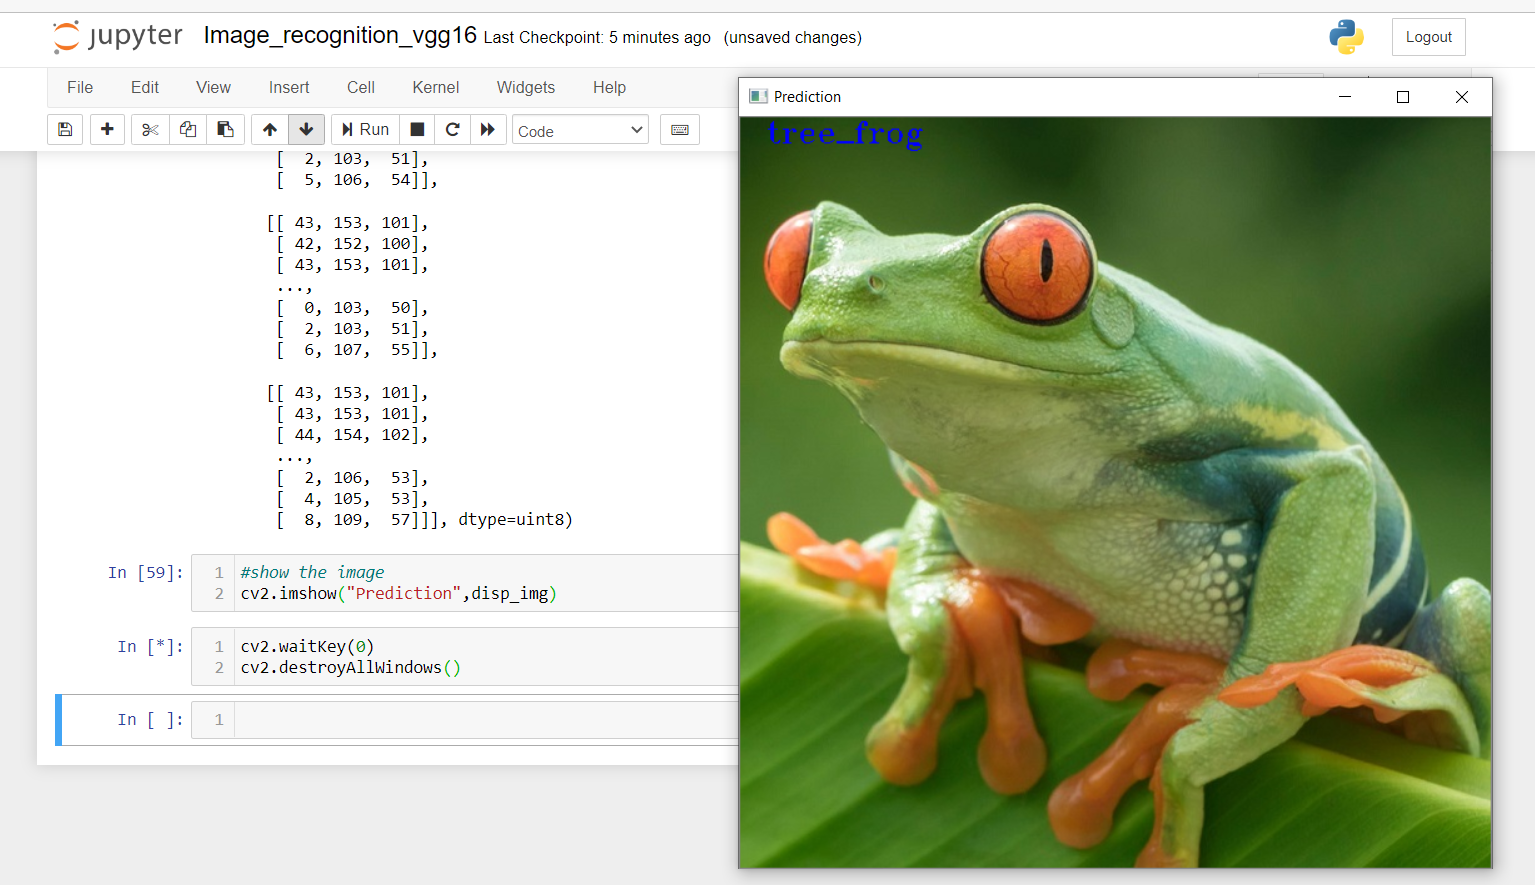